# **Lab 1 Data Warehouse Systems**
Dr. Rim Moussa


ENI-Carthage University of Carthage  

In [ ]:
Groupe 3ème info B:

-Mohamed Dhia Eddine Thabet
-Mohamed Dridi
-Sarra hamzaoui
-Ilef Karoui

# **TPC-H benchmark .tbl files**
copy the following directory into your google drive [TPC-H data](https://drive.google.com/drive/folders/1ESTz3WeepyQaB3b8bW5ZP8KFT1JkgSRf)

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import time
import io
from google.colab import files
import csv
from google.colab import drive
# Step 1: Mount Google Drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
supplier_input_file_path = '/content/drive/MyDrive/TPCH_data/supplier.tbl'
customer_input_file_path = '/content/drive/MyDrive/TPCH_data/customer.tbl'
lineitem_input_file_path = '/content/drive/MyDrive/TPCH_data/lineitem.tbl'
supplier_input_file_path = '/content/drive/MyDrive/TPCH_data/supplier.tbl'
nation_input_file_path = '/content/drive/MyDrive/TPCH_data/nation.tbl'
orders_input_file_path = '/content/drive/MyDrive/TPCH_data/orders.tbl'
part_input_file_path = '/content/drive/MyDrive/TPCH_data/part.tbl'
partsupp_input_file_path = '/content/drive/MyDrive/TPCH_data/partsupp.tbl'

# **TASK 1:**
**Q1.** What are the benefits of benchmarks for desision support systems technogies?

**Q2.** Describe TPC-H benchmark (how many tables? how many queries? type of queries? query patterns?).

Q1) Benchmarks provide standardized, repeatable, and comparable evaluations of decision support system technologies such as databases, data warehouses, and OLAP tools.

Q2) TPC-H (Transaction Processing Performance Council – Decision Support Benchmark H)
is an industry-standard benchmark used to evaluate the performance of decision support systems and data warehouses.

Overview

Goal: Measure the ability of a system to handle complex analytical queries and large volumes of data.

Data Model: Based on a product supplier and sales business schema.

TPC-H consists of 8 relational tables, representing a simplified business model:

1. PART

2. SUPPLIER

3. PARTSUPP

4. CUSTOMER

5. ORDERS

6. LINEITEM

7. NATION

8. REGION


| Feature           | TPC-H Benchmark                              |
| ----------------- | -------------------------------------------- |
| **Purpose**       | Evaluate decision-support system performance |
| **# Tables**      | 8                                            |
| **# Queries**     | 22                                           |
| **Query Type**    | Read-only, complex analytical SQL            |
| **Query Pattern** | Multi-table joins, aggregations, filters     |
| **Metrics**       | QphH@Size, Price/Performance                 |


# **DASK SQL**

In [ ]:
!pip install "dask[complete]==2024.5.0" dask-sql==2024.5.0 dask-expr==1.1.0



In [ ]:
import dask
from dask_sql import Context

print("Dask version:", dask.__version__)
print("Dask SQL successfully installed!")

Dask version: 2024.5.0
Dask SQL successfully installed!


In [ ]:
import dask.dataframe as dd
from dask_sql import Context

lineitem_input_file_path = "/content/drive/MyDrive/TPCH_data/lineitem.tbl"

# TPC-H lineitem has 16 fields; add a dummy last column to absorb trailing '|'
cols = [
    "l_orderkey", "l_partkey", "l_suppkey", "l_linenumber",
    "l_quantity", "l_extendedprice", "l_discount", "l_tax",
    "l_returnflag", "l_linestatus",
    "l_shipdate", "l_commitdate", "l_receiptdate",
    "l_shipinstruct", "l_shipmode", "l_comment", "extra"
]

# Read CSV with no header, absorb trailing empty field
lineitem_df = dd.read_csv(
    lineitem_input_file_path,
    sep="|",
    names=cols,
    header=None,
    dtype="string",
    assume_missing=True,
    usecols=cols[:-1]  # ignore the extra trailing column
)

# Convert numeric columns
numeric_cols = ["l_orderkey", "l_partkey", "l_suppkey", "l_linenumber",
                "l_quantity", "l_extendedprice", "l_discount", "l_tax"]
for col in numeric_cols:
    lineitem_df[col] = dd.to_numeric(lineitem_df[col], errors="coerce")

# Convert date columns
date_cols = ["l_shipdate", "l_commitdate", "l_receiptdate"]
for col in date_cols:
    lineitem_df[col] = dd.to_datetime(lineitem_df[col], errors="coerce")

# Register in Dask SQL
context = Context()
context.create_table("lineitem", lineitem_df)

print(lineitem_df.head())


   l_orderkey  l_partkey  l_suppkey  l_linenumber  l_quantity  \
0           1       1552         93             1          17   
1           1        674         75             2          36   
2           1        637         38             3           8   
3           1         22         48             4          28   
4           1        241         23             5          24   

   l_extendedprice  l_discount  l_tax l_returnflag l_linestatus l_shipdate  \
0         24710.35        0.04   0.02            N            O 1996-03-13   
1         56688.12        0.09   0.06            N            O 1996-04-12   
2         12301.04         0.1   0.02            N            O 1996-01-29   
3         25816.56        0.09   0.06            N            O 1996-04-21   
4         27389.76         0.1   0.04            N            O 1996-03-30   

  l_commitdate l_receiptdate     l_shipinstruct l_shipmode  \
0   1996-02-12    1996-03-22  DELIVER IN PERSON      TRUCK   
1   1996-02-28  

In [ ]:
customer_cols = [
    "c_custkey", "c_name", "c_address", "c_nationkey",
    "c_phone", "c_acctbal", "c_mktsegment", "c_comment", "extra"
]

customer_df = dd.read_csv(
    "/content/drive/MyDrive/TPCH_data/customer.tbl",
    sep="|",
    names=customer_cols,
    header=None,
    dtype="string",
    assume_missing=True,
    usecols=customer_cols[:-1]
)

# numeric columns
for col in ["c_custkey", "c_nationkey", "c_acctbal"]:
    customer_df[col] = dd.to_numeric(customer_df[col], errors="coerce")

context.create_table("customer", customer_df)
print(customer_df.head())

   c_custkey              c_name                       c_address  c_nationkey  \
0          1  Customer#000000001               IVhzIApeRb ot,c,E           15   
1          2  Customer#000000002  XSTf4,NCwDVaWNe6tEgvwfmRchLXak           13   
2          3  Customer#000000003                    MG9kdTD2WBHm            1   
3          4  Customer#000000004                     XxVSJsLAGtn            4   
4          5  Customer#000000005    KvpyuHCplrB84WgAiGV6sYpZq7Tj            3   

           c_phone  c_acctbal c_mktsegment  \
0  25-989-741-2988     711.56     BUILDING   
1  23-768-687-3665     121.65   AUTOMOBILE   
2  11-719-748-3364    7498.12   AUTOMOBILE   
3  14-128-190-5944    2866.83    MACHINERY   
4  13-750-942-6364     794.47    HOUSEHOLD   

                                           c_comment  
0  to the even, regular platelets. regular, ironi...  
1  l accounts. blithely ironic theodolites integr...  
2   deposits eat slyly ironic, even instructions....  
3   requests. fi

In [ ]:
orders_cols = [
    "o_orderkey", "o_custkey", "o_orderstatus", "o_totalprice",
    "o_orderdate", "o_orderpriority", "o_clerk", "o_shippriority",
    "o_comment", "extra"
]

orders_df = dd.read_csv(
    "/content/drive/MyDrive/TPCH_data/orders.tbl",
    sep="|",
    names=orders_cols,
    header=None,
    dtype="string",
    assume_missing=True,
    usecols=orders_cols[:-1]
)

for col in ["o_orderkey", "o_custkey", "o_totalprice", "o_shippriority"]:
    orders_df[col] = dd.to_numeric(orders_df[col], errors="coerce")

orders_df["o_orderdate"] = dd.to_datetime(orders_df["o_orderdate"], errors="coerce")

context.create_table("orders", orders_df)
print(orders_df.head())

   o_orderkey  o_custkey o_orderstatus  o_totalprice o_orderdate  \
0           1        370             O     172799.49  1996-01-02   
1           2        781             O      38426.09  1996-12-01   
2           3       1234             F      205654.3  1993-10-14   
3           4       1369             O      56000.91  1995-10-11   
4           5        445             F     105367.67  1994-07-30   

  o_orderpriority          o_clerk  o_shippriority  \
0           5-LOW  Clerk#000000951               0   
1        1-URGENT  Clerk#000000880               0   
2           5-LOW  Clerk#000000955               0   
3           5-LOW  Clerk#000000124               0   
4           5-LOW  Clerk#000000925               0   

                                           o_comment  
0                 nstructions sleep furiously among   
1   foxes. pending accounts at the pending, silen...  
2  sly final accounts boost. carefully regular id...  
3  sits. slyly regular warthogs cajole. regula

In [ ]:
supplier_cols = [
    "s_suppkey", "s_name", "s_address", "s_nationkey",
    "s_phone", "s_acctbal", "s_comment", "extra"
]

supplier_df = dd.read_csv(
    "/content/drive/MyDrive/TPCH_data/supplier.tbl",
    sep="|",
    names=supplier_cols,
    header=None,
    dtype="string",
    assume_missing=True,
    usecols=supplier_cols[:-1]
)

for col in ["s_suppkey", "s_nationkey", "s_acctbal"]:
    supplier_df[col] = dd.to_numeric(supplier_df[col], errors="coerce")

context.create_table("supplier", supplier_df)
print(supplier_df.head())

   s_suppkey              s_name                            s_address  \
0          1  Supplier#000000001   N kD4on9OM Ipw3,gf0JBoQDd7tgrzrddZ   
1          2  Supplier#000000002                89eJ5ksX3ImxJQBvxObC,   
2          3  Supplier#000000003    q1,G3Pj6OjIuUYfUoH18BFTKP5aU9bEV3   
3          4  Supplier#000000004            Bk7ah4CK8SYQTepEmvMkkgMwg   
4          5  Supplier#000000005                    Gcdm2rJRzl5qlTVzc   

   s_nationkey          s_phone  s_acctbal  \
0           17  27-918-335-1736    5755.94   
1            5  15-679-861-2259    4032.68   
2            1  11-383-516-1199     4192.4   
3           15  25-843-787-7479    4641.08   
4           11  21-151-690-3663    -283.84   

                                           s_comment  
0                       each slyly above the careful  
1             slyly bold instructions. idle dependen  
2  blithely silent requests after the express dep...  
3                riously even requests above the exp  
4        

In [ ]:
part_cols = [
    "p_partkey", "p_name", "p_mfgr", "p_brand", "p_type",
    "p_size", "p_container", "p_retailprice", "p_comment", "extra"
]

part_df = dd.read_csv(
    "/content/drive/MyDrive/TPCH_data/part.tbl",
    sep="|",
    names=part_cols,
    header=None,
    dtype="string",
    assume_missing=True,
    usecols=part_cols[:-1]
)

for col in ["p_partkey", "p_size", "p_retailprice"]:
    part_df[col] = dd.to_numeric(part_df[col], errors="coerce")

context.create_table("part", part_df)
print(part_df.head())

   p_partkey                                    p_name          p_mfgr  \
0          1  goldenrod lavender spring chocolate lace  Manufacturer#1   
1          2          blush thistle blue yellow saddle  Manufacturer#1   
2          3       spring green yellow purple cornsilk  Manufacturer#4   
3          4     cornflower chocolate smoke green pink  Manufacturer#3   
4          5             forest brown coral puff cream  Manufacturer#3   

    p_brand                   p_type  p_size p_container  p_retailprice  \
0  Brand#13   PROMO BURNISHED COPPER       7   JUMBO PKG          901.0   
1  Brand#13      LARGE BRUSHED BRASS       1     LG CASE          902.0   
2  Brand#42  STANDARD POLISHED BRASS      21   WRAP CASE          903.0   
3  Brand#34       SMALL PLATED BRASS      14    MED DRUM          904.0   
4  Brand#32    STANDARD POLISHED TIN      15      SM PKG          905.0   

             p_comment  
0      ly. slyly ironi  
1     lar accounts amo  
2  egular deposits hag  
3   

In [ ]:
partsupp_cols = [
    "ps_partkey", "ps_suppkey", "ps_availqty",
    "ps_supplycost", "ps_comment", "extra"
]

partsupp_df = dd.read_csv(
    "/content/drive/MyDrive/TPCH_data/partsupp.tbl",
    sep="|",
    names=partsupp_cols,
    header=None,
    dtype="string",
    assume_missing=True,
    usecols=partsupp_cols[:-1]
)

for col in ["ps_partkey", "ps_suppkey", "ps_availqty", "ps_supplycost"]:
    partsupp_df[col] = dd.to_numeric(partsupp_df[col], errors="coerce")

context.create_table("partsupp", partsupp_df)
print(partsupp_df.head())

   ps_partkey  ps_suppkey  ps_availqty  ps_supplycost  \
0           1           2         3325         771.64   
1           1          27         8076         993.49   
2           1          52         3956         337.09   
3           1          77         4069         357.84   
4           2           3         8895         378.49   

                                          ps_comment  
0  , even theodolites. regular, final theodolites...  
1  ven ideas. quickly even packages print. pendin...  
2  after the fluffily ironic deposits? blithely s...  
3  al, regular dependencies serve carefully after...  
4  nic accounts. final accounts sleep furiously a...  


In [ ]:
nation_cols = ["n_nationkey", "n_name", "n_regionkey", "n_comment", "extra"]

nation_df = dd.read_csv(
    "/content/drive/MyDrive/TPCH_data/nation.tbl",
    sep="|",
    names=nation_cols,
    header=None,
    dtype="string",
    assume_missing=True,
    usecols=nation_cols[:-1]
)

for col in ["n_nationkey", "n_regionkey"]:
    nation_df[col] = dd.to_numeric(nation_df[col], errors="coerce")

context.create_table("nation", nation_df)
print(nation_df.head())

   n_nationkey     n_name  n_regionkey  \
0            0    ALGERIA            0   
1            1  ARGENTINA            1   
2            2     BRAZIL            1   
3            3     CANADA            1   
4            4      EGYPT            4   

                                           n_comment  
0   haggle. carefully final deposits detect slyly...  
1  al foxes promise slyly according to the regula...  
2  y alongside of the pending deposits. carefully...  
3  eas hang ironic, silent packages. slyly regula...  
4  y above the carefully unusual theodolites. fin...  


In [ ]:
query = """
SELECT l_returnflag, AVG(CAST(l_quantity AS DOUBLE)) AS avg_qty
FROM lineitem
GROUP BY l_returnflag
"""
start_time = time.time()
result = context.sql(query).compute()
print(result)
end_time = time.time()
elapsed_time = end_time - start_time
print(f"Elapsed time: {elapsed_time} seconds")

  l_returnflag    avg_qty
0            N  25.470342
1            R  25.597168
2            A  25.575155
Elapsed time: 0.2893507480621338 seconds


# **TASK 2**
**Q3.** Define Dask-SQL

**Q4.** Describe using a deployement model (UML) the system architecture described in this notebook

Q3) Dask-SQL is an open-source project that extends the Dask framework to allow SQL queries to be executed on distributed Dask DataFrames.

It provides a SQL interface for big data processing in Python, combining the scalability of Dask with the familiarity of SQL.

Q4)

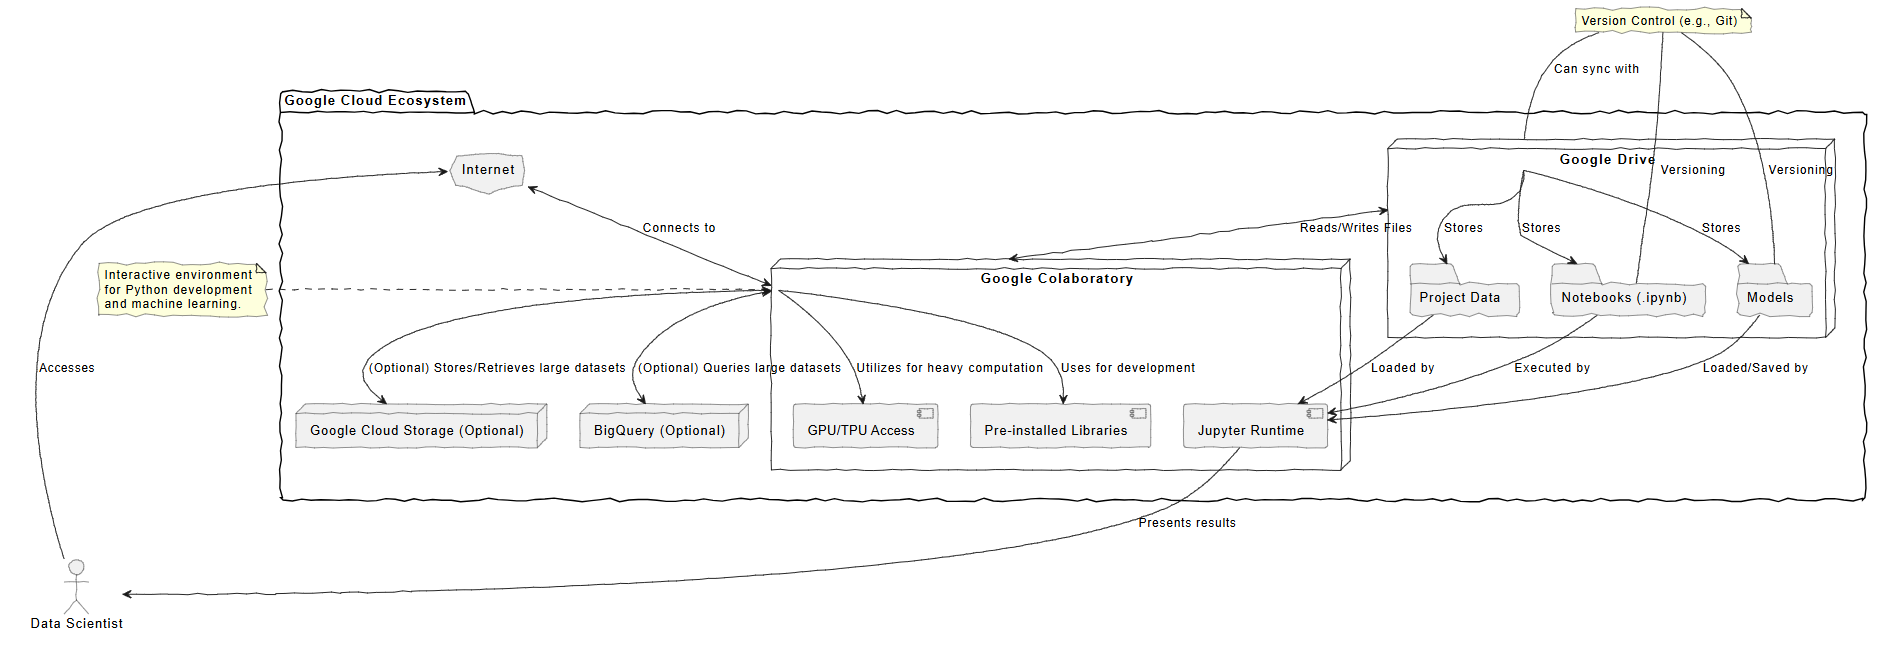

# **TPC-H Workload SQL**

# **TASK 3**
**Q5.** Pick 4 TPC-H  queries (at random) (ref. [TPC-H workload](https://drive.google.com/file/d/1_WsbUBO0EuIYUp6RUJhVceKk8i18BjkP/view?usp=drive_link)) and print their resultsets.

--pick different sets of queries and write your selection here [lab 1 student groups](https://docs.google.com/spreadsheets/d/1gR7SJDr2d2fmpDesOq_930do8Ati06ShDNQHjGC4v1M/edit?usp=sharing)

In [ ]:

region_cols = ["r_regionkey", "r_name", "r_comment", "extra"]

region_df = dd.read_csv(
    "/content/drive/MyDrive/TPCH_data/region.tbl",
    sep="|",
    names=region_cols,
    header=None,
    dtype="string",
    assume_missing=True,
    usecols=region_cols[:-1]
)

for col in ["r_regionkey"]:
    region_df[col] = dd.to_numeric(region_df[col], errors="coerce")

context.create_table("region", region_df)
print(region_df.head())

   r_regionkey       r_name                                          r_comment
0            0       AFRICA  lar deposits. blithely final packages cajole. ...
1            1      AMERICA                    hs use ironic, even requests. s
2            2         ASIA                    ges. thinly even pinto beans ca
3            3       EUROPE      ly final courts cajole furiously final excuse
4            4  MIDDLE EAST  uickly special accounts cajole carefully blith...


In [ ]:
#q1
query = """
SELECT l_returnflag, l_linestatus,
sum(l_quantity) as sum_qty,
sum(l_extendedprice) as sum_base_price,
sum(l_extendedprice*(1-l_discount)) as sum_disc_price,
sum(l_extendedprice*(1-l_discount)*(1+l_tax)) as
sum_charge,
avg(l_quantity) as avg_qty,
avg(l_extendedprice) as avg_price,
avg(l_discount) as avg_disc,
count(*) as count_order
FROM lineitem
WHERE l_shipdate <= date '1998-12-01' - interval '60'
day
GROUP BY l_returnflag, l_linestatus
"""

result = context.sql(query).compute()
print(result)

  l_returnflag l_linestatus  sum_qty  sum_base_price   sum_disc_price  \
0            N            O   754857   1058264409.38  1005632286.4836   
1            R            F   381449    534594445.35   507996454.4067   
2            A            F   380456    532348211.65   505822441.4861   
3            N            F     8971     12384801.37     11798257.208   

          sum_charge    avg_qty     avg_price  avg_disc  count_order  
0  1045983509.814722  25.459779  35693.089459  0.049941        29649  
1   528524219.358903  25.597168  35874.006533  0.049828        14902  
2   526165934.000839  25.575155  35785.709307  0.050081        14876  
3    12282485.056933  25.778736  35588.509684  0.047759          348  


In [ ]:
#q12
query = """
SELECT l_shipmode, sum(case
when o_orderpriority ='1-URGENT' or o_orderpriority
='2-HIGH' then 1 else 0 end) as high_line_count,
sum(case when o_orderpriority <> '1-URGENT' and
o_orderpriority <> '2-HIGH' then 1 else 0 end) as
low_line_count
FROM orders, lineitem
WHERE o_orderkey = l_orderkey
and l_shipmode in ('MAIL', 'SHIP')
and l_commitdate < l_receiptdate
and l_shipdate < l_commitdate
and l_receiptdate >= date '1994-01-01'
and l_receiptdate < date '1994-01-01' + interval '1' year
GROUP BY l_shipmode ORDER BY l_shipmode;
"""

result = context.sql(query).compute()
print(result)

  l_shipmode  high_line_count  low_line_count
1       MAIL               64              86
0       SHIP               61              96


In [ ]:
#q14
query = """
SELECT 100.00 * sum(case
when p_type like 'PROMO%'
then l_extendedprice*(1-l_discount)
else 0 end) / sum(l_extendedprice * (1 - l_discount)) as
promo_revenue
FROM lineitem, part
WHERE l_partkey = p_partkey
and l_shipdate >= date '1995-09-01'
and l_shipdate < date '1995-09-01' + interval '1' month;
"""

result = context.sql(query).compute()
print(result)

   promo_revenue
0      15.486546


In [ ]:
#q18
query = """
SELECT c_name, c_custkey, o_orderkey, o_orderdate,
o_totalprice, sum(l_quantity)
FROM CUSTOMER, ORDERS, LINEITEM
WHERE o_orderkey in ( select l_orderkey
from LINEITEM
group by l_orderkey
having sum(l_quantity) > 300)
and c_custkey = o_custkey
and o_orderkey = l_orderkey
GROUP BY c_name, c_custkey, o_orderkey, o_orderdate,
o_totalprice
ORDER BY o_totalprice desc, o_orderdate;
"""

result = context.sql(query).compute()
print(result)

               c_name  c_custkey  o_orderkey o_orderdate  o_totalprice  \
1  Customer#000000667        667       29158  1995-10-21     439687.23   
0  Customer#000000178        178        6882  1997-04-09     422359.65   

   SUM(lineitem.l_quantity)  
1                       305  
0                       303  


# **Parquet Columnar-Storage**

# **TASK 4**
**Q6.** What's Parquet?

**Q7.** Give 2 benefits of open Data Formats?


**Q8.** Give 4 benefits of columnar storage formats


# **TASK 5**

**Q9.** Convert TPC-H .tbl files into Parquet data format

# **TASK 6**

**Q10.** Re-write the 4 TPC-H queries you selected using parquet data format as source

**Q11.** Compare time performance